<h1 style="font-size:40px;"><center>Exercise II:<br> Model selection with MLPs
</center></h1>


# Short summary
In this exercise you will: 

* train MLPs and for both classification and regression problems and perform model selection to optimize validation performance

There are 10 questions in this exercise. These 10 questions can be found in five different cells below (see section "The Different Cells"). All of the exercises deal with training and evaluation of the multi-layer perceptron (MLP) network. You are going to work with different datasets, binary and multiple classification problems and a regression problem. For questions 1-6, code is available that you can run directly or only need to make small modifications to. For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way).

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report". Finally before you start:

**Deadline for submitting the report: December 10, 13:00 (2021)**

## The data
There are several datasets in this exercise. 

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated "on the fly" each time. Data are generated from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There is also a synthetic regression problem, called *regr2*. It has 6 inputs (independent variables) and one output variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distrubuted with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The questions
There are 10 questions, where the first 3 questions are dealing with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deals with training a regression network for the *regr2* dataset. Question 7-8 deals with Japanese vowels classification problem, here your task is to come up with a model that optimizes the validation result. Question 9 is for the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1-3 |
| 9 | Ex2 | Exercise | For question 4-6 |
| 10 | Ex3 | Exercise | For question 7-8 |
| 11 | Ex4 | Exercise | For question 9 |
| 12 | Ex5 | Exercise | For question 10 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [82]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection

### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: 


* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* metric: The metric to use besides the loss. Common values
    * accuracy
    * mse

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [92]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the different synthetic data sets. It also provides functions for reading the Vowles dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data. 

Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def regr2(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn2 and the spiral dataset and plot them. 

Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

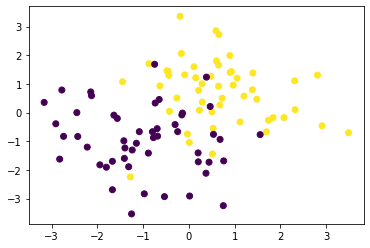

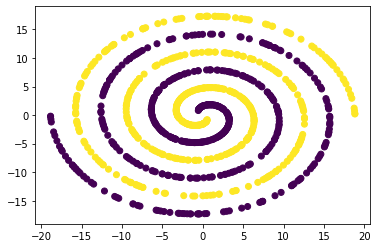

In [4]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. 

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.10f}'.format(A[i], B[i]))

    return print('\n','#'*50)


### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {}'.format(label), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    print('accuracy:   ', '{:.4f}'.format((y_class==d_class).mean()), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix")

    

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. 

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for question 1-3

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyper parameters etc. 

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

#### Question 1
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points. 

Now, use *syn2*(100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** 

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember for the first computer exercise that you should average over a few trained models.

----
Accuracy        0.8780
Sensitivity     0.9040
Specificity     0.8520
Loss            0.2917


#### Question 2
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding good local minimum of the loss function, which may require some tuning of the hyper parameters that controls the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is therefore used in the cells below as the default minimizer. 

----
With 10 nodes, we receive an accuracy of 96% with all the hyperparameters constant. If we allow to change hyper-parameters, we can get away with 8 hidden nodes (lr_rate = 0.04, batch_size 30, epochs 700). With this network we get the following training stats:
Accuracy        0.9500
Sensitivity     0.9400
Specificity     0.9600
Loss            0.0798


#### Question 3
However, we are almost always interested in optimal validation performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained?**

---
Keeping constant hyperparameters (lr_rate = 0.05, batch_size = 25, epochs = 500)
Nodes, validation accuracy
1 0.8710
2 0.8270
3 0.8350
4 0.8370
5 0.8380

Looking at the data, we see that the optimal decision boundary for any random dataset is a straight line. Hence, a single hidden should perform best with its linear decision boundary (unlike higher-order networks with clear overfitting), which we can see in the above tests. 


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


2021-12-04 14:49:53.561834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 14:49:53.646192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 14:50:28.496273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 14:50:28.533793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 14:50:28.575197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 14:50:28.617044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



 ########## STATISTICS for Training Data ########## 

Accuracy        0.8600
Sensitivity     0.8400
Specificity     0.8800
Loss            0.3283

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8780
Sensitivity     0.9040
Specificity     0.8520
Loss            0.2917

 ##################################################


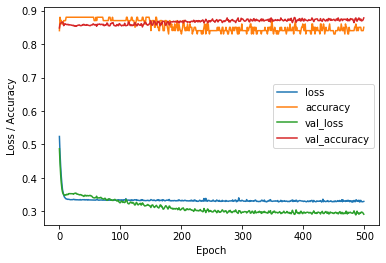

2021-12-04 14:50:28.722757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


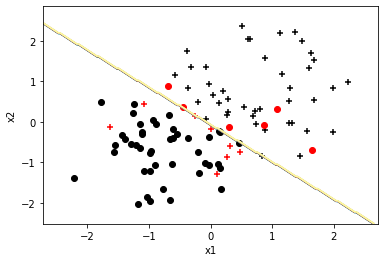

In [13]:
%%time
## Question 1
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [1],                      # architecture
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learningrate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                      epochs = 500,      
                      validation_data=(x_val, d_val),
                      batch_size=25,
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex1)
stats_class(x_val, d_val, 'Validation', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 24        
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


2021-12-04 15:08:11.126390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:08:11.254434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:09:10.620748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:09:10.668949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:09:10.715808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:09:10.757962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



 ########## STATISTICS for Training Data ########## 

Accuracy        0.9500
Sensitivity     0.9400
Specificity     0.9600
Loss            0.0798

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8330
Sensitivity     0.8760
Specificity     0.7900
Loss            1.1155

 ##################################################


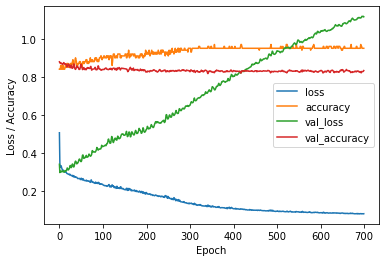

2021-12-04 15:09:10.873116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


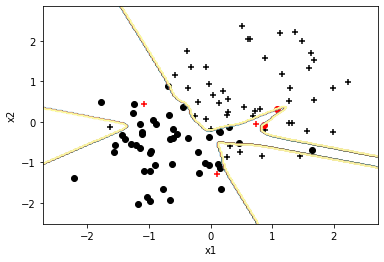

CPU times: user 51.9 s, sys: 28.6 s, total: 1min 20s
Wall time: 1min 1s


In [30]:
%%time
## Question 2
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [8],                      # architecture
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learningrate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                      epochs = 700,      
                      validation_data=(x_val, d_val),
                      batch_size=30,
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex1)
stats_class(x_val, d_val, 'Validation', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 3         
_________________________________________________________________
dropout_22 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


2021-12-04 15:21:17.183009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:21:17.291994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:21:51.328691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:21:51.366527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:21:51.410996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:21:51.453388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



 ########## STATISTICS for Training Data ########## 

Accuracy        0.8400
Sensitivity     0.8600
Specificity     0.8200
Loss            0.3276

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8710
Sensitivity     0.9060
Specificity     0.8360
Loss            0.2953

 ##################################################


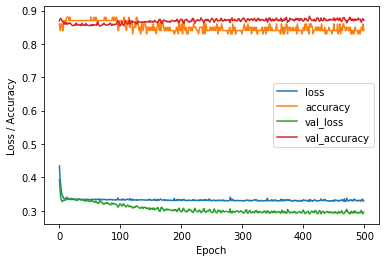

2021-12-04 15:21:51.562826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


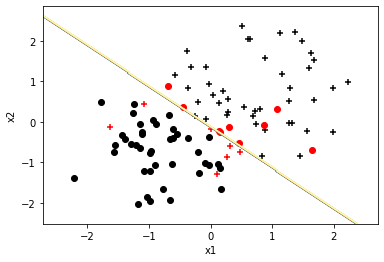

CPU times: user 31.1 s, sys: 14.6 s, total: 45.7 s
Wall time: 35.6 s


In [35]:
%%time
## Question 3
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [1],                      # architecture
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learningrate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                      epochs = 500,      
                      validation_data=(x_val, d_val),
                      batch_size=25,
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex1)
stats_class(x_val, d_val, 'Validation', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for question 4-6

Now we are going to look at a regression problem. The data as described above (regr2) consists of 6 inputs (features) and one output (target) value. As for the previous exercise a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error mean good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as an template for all questions regarding this regression problem.

#### Question 4
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes do you find that gives best validation performance?** Make a note of the best validation MSE (or correlation coefficient) you get.

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result. 

---
Using the default hyperparameters.
Run 1:

Nodes, MSE
**1: 0.5971611738**
2: 0.6119188070
3: 0.6430530548
**4: 0.5613020062**
5: 0.7509353757

Run 2:
1: 0.6017894149
**4: 0.5126953125**

Looking at the above numbers, it seems like 4 nodes gives the lowest MSE using the default parameters.

#### Question 5
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**

---
Using 8 hidden nodes.

lambd, MSE
0.0: 0.6774694920
0.2: 0.6017894149
0.3: 0.6077176929
**0.4: 0.5969517827**
0.5: 0.6378090978
0.6: 0.6189390421
0.8: 0.6031998992

It seems like it improves the error substantially, however with the default other parameters it does not outperform the smaller network without L2.


#### Question 6
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?** 

**Hint:** Using dropout may require even more hidden nodes to start with! 

---
Using 12 hidden nodes.

drop_nod, MSE
0.0: 0.5740687847
0.1: 0.5185875893
**0.2: 0.5177022815**
0.3: 0.5748681426
0.4: 0.6039562821
0.6: 0.6043797135

It seems like it improves the error substantially, and gives about the equivalent accuracy to the 4 node network.





#### Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and does not influence any grading.** 

Repeat Q4-Q6 using two hidden layers.


Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 6)]               0         
_________________________________________________________________
dense_92 (Dense)             (None, 4)                 28        
_________________________________________________________________
dropout_46 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


/Users/mahirhambiralovic/miniforge3/envs/edan95/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-04 15:42:47.376658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:42:47.460075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



 ########## STATISTICS for Training Data ########## 

MSE             0.5121107697
CorrCoeff       0.7297356706

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.6378090978
CorrCoeff       0.6396759819

 ##################################################


2021-12-04 15:43:08.187516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


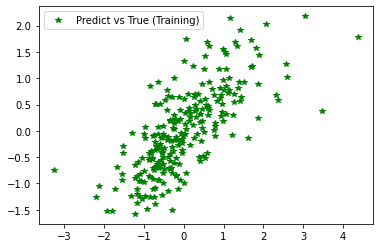

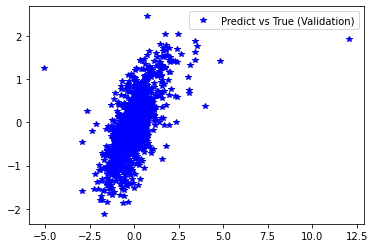

CPU times: user 19.1 s, sys: 9.58 s, total: 28.7 s
Wall time: 21.1 s


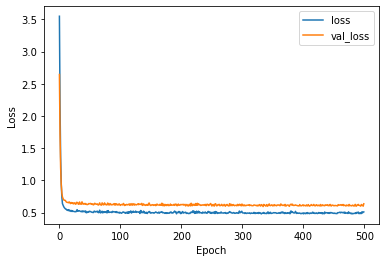

In [59]:
%%time
# QUESTION 4
# seed = 0 means random, seed > 0 means fixed
seed = 9
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [4],                  
         'drop_nod': 0.0,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.5,             
         'num_out' : 1 }    

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()
    
# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 500,                     
                      validation_data=(x_val,d_val),
                      batch_size=50,                    
                      verbose = 0)

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

/Users/mahirhambiralovic/miniforge3/envs/edan95/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-04 15:45:34.914016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 15:45:34.996225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 6)]               0         
_________________________________________________________________
dense_102 (Dense)            (None, 12)                84        
_________________________________________________________________
dropout_51 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

MSE             0.3217139840
CorrCoeff       0.8816516959

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5376768708
CorrCoef

2021-12-04 15:45:53.580889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


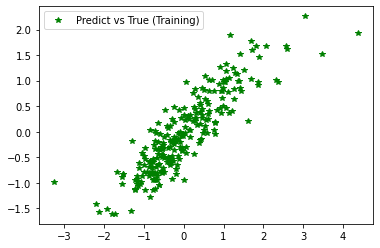

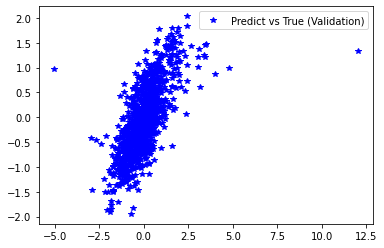

CPU times: user 16.3 s, sys: 7.85 s, total: 24.2 s
Wall time: 18.9 s


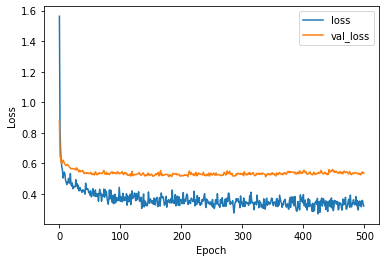

In [64]:
%%time
# QUESTION 4
# seed = 0 means random, seed > 0 means fixed
seed = 9
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [12],                  
         'drop_nod': 0.2,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.0,             
         'num_out' : 1 }    

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()
    
# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 500,                     
                      validation_data=(x_val,d_val),
                      batch_size=50,                    
                      verbose = 0)

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for question 7-8

For this exercise you are given a classification problem with a fixed training-, validation- and test dataset. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here, normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 7
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.**

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

---
With nodes=[30,15], lr_rate=0.04, epochs=100, drop_nod=0.15, batch_size=200 

**test accuracy: 0.91**

#### Question 8
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overtraining by looking at the *loss* of the validation data, since this is the error used during training. One can however have a situation where the loss increases for the validation data but the accuracy stays constant (**why?**). **Given this situation, what would be your criteria to select the best model?** 

---
Since loss is dependant on the distance from the predicted value to the actual value (in classification this is a float 0 to 1), but accuracy is dependant on the binary classification of a 1 or a zero, an increasing loss could mean that the model is less "sure" of its predictions (the prediction is closer to the threshold e.g. 0.5), but the number of correct answers above or below the threshold is the same.
The best criteria would be the accuracy in this case.


softmax
Model: "model_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 12)]              0         
_________________________________________________________________
dense_253 (Dense)            (None, 30)                390       
_________________________________________________________________
dropout_149 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_254 (Dense)            (None, 15)                465       
_________________________________________________________________
dropout_150 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_255 (Dense)            (None, 9)                 144       
Total params: 999
Trainable params: 999
Non-trainable params: 0
___________________________________________________

/Users/mahirhambiralovic/miniforge3/envs/edan95/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-04 16:44:59.280325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 17ms/step - loss: 1.5363 - accuracy: 0.4303 - val_loss: 0.7556 - val_accuracy: 0.7354
Epoch 2/100
 8/22 [=========>....................] - ETA: 0s - loss: 0.9749 - accuracy: 0.6294

2021-12-04 16:44:59.627157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 11ms/step - loss: 0.8842 - accuracy: 0.6673 - val_loss: 0.5539 - val_accuracy: 0.8048
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.7005 - accuracy: 0.7536 - val_loss: 0.4366 - val_accuracy: 0.8536
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5888 - accuracy: 0.7880 - val_loss: 0.4188 - val_accuracy: 0.8668
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5304 - accuracy: 0.8109 - val_loss: 0.3833 - val_accuracy: 0.8769
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4798 - accuracy: 0.8297 - val_loss: 0.3363 - val_accuracy: 0.9051
Epoch 7/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4694 - accuracy: 0.8353 - val_loss: 0.3216 - val_accuracy: 0.9064
Epoch 8/100
22/22 [==============================] - 0s 12ms/step - loss: 0.4466 - accuracy: 0.8451 - val_loss: 0.3194 - val_accuracy: 0.8985
Epoch 9/100
22/22 

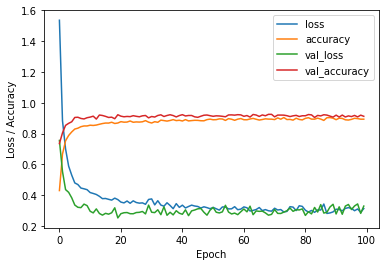


 ########## Result for Training data ########## 

log_loss:    0.1616
accuracy:    0.9401 

              precision    recall  f1-score   support

     class 1       0.96      0.97      0.96       542
     class 2       0.84      0.95      0.89       465
     class 3       0.97      0.92      0.94       424
     class 4       0.92      0.96      0.94       606
     class 5       0.92      0.99      0.96       397
     class 6       0.98      1.00      0.99       523
     class 7       0.99      0.98      0.99       506
     class 8       0.92      0.74      0.82       377
     class 9       0.97      0.90      0.94       434

    accuracy                           0.94      4274
   macro avg       0.94      0.93      0.94      4274
weighted avg       0.94      0.94      0.94      4274



2021-12-04 16:45:24.390834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


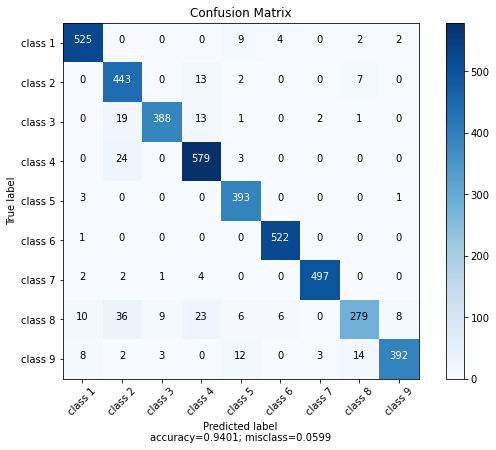


 ########## Result for Validation data ########## 

log_loss:    0.3295
accuracy:    0.9125 

              precision    recall  f1-score   support

     class 1       0.89      0.98      0.94       214
     class 2       0.77      0.96      0.85       203
     class 3       0.96      0.90      0.93       467
     class 4       0.92      0.93      0.93       365
     class 5       0.88      0.97      0.92       158
     class 6       0.96      1.00      0.98       169
     class 7       0.97      0.94      0.95       281
     class 8       0.90      0.72      0.80       264
     class 9       0.92      0.85      0.88       154

    accuracy                           0.91      2275
   macro avg       0.91      0.92      0.91      2275
weighted avg       0.92      0.91      0.91      2275



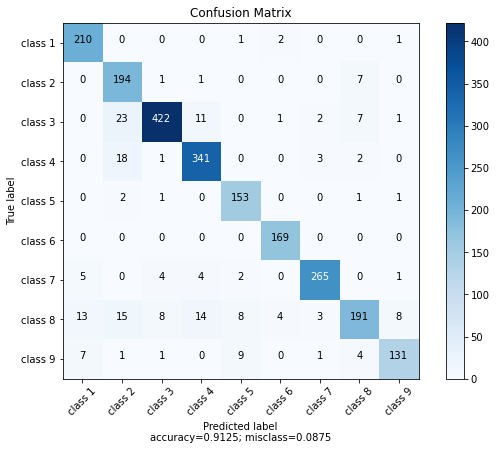


 ########## Result for Test data ########## 

log_loss:    0.3413
accuracy:    0.9071 

              precision    recall  f1-score   support

     class 1       0.92      0.97      0.95       340
     class 2       0.75      0.93      0.83       323
     class 3       0.97      0.88      0.92       723
     class 4       0.92      0.92      0.92       502
     class 5       0.87      0.96      0.91       227
     class 6       0.95      1.00      0.97       271
     class 7       0.97      0.98      0.97       383
     class 8       0.85      0.74      0.79       370
     class 9       0.94      0.82      0.88       273

    accuracy                           0.91      3412
   macro avg       0.90      0.91      0.90      3412
weighted avg       0.91      0.91      0.91      3412



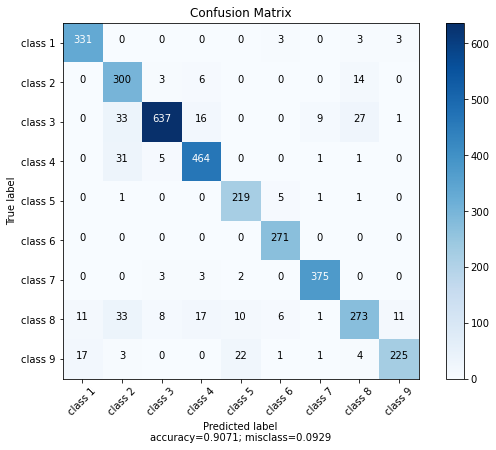

CPU times: user 23.4 s, sys: 10.3 s, total: 33.7 s
Wall time: 26.2 s


In [149]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# YOUR CODE FOR NORMALIZATION
x_trn = preprocessing.normalize(x_trn)
x_val = preprocessing.normalize(x_val)
x_tst = preprocessing.normalize(x_tst)

num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [30, 15],                  
         'drop_nod': 0.15,                
         'act_fun': 'relu',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun': 'categorical_crossentropy',           
         'lr_rate': 0.04,
         'metric': 'accuracy',              
         'lambd' : 0.0,
         'num_out' : num_classes }

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 100,     
                      validation_data=(x_val,d_val),
                      batch_size=200,          
                      verbose = 1)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')

### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 9

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 9
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

---
a) Managed to get 0.63 accuracy and 0.55 recall with a n_nod=[50, 10], drop_nod: 0.15, lr_rate: 0.02, epochs=100

b) The sensitivity (recall) of the predictions is very important, as the model can achieve high accuracy despite having 100% false negatives.


(584, 9) (584, 3)
softmax
Model: "model_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 9)]               0         
_________________________________________________________________
dense_449 (Dense)            (None, 50)                500       
_________________________________________________________________
dropout_283 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_450 (Dense)            (None, 10)                510       
_________________________________________________________________
dropout_284 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_451 (Dense)            (None, 3)                 33        
Total params: 1,043
Trainable params: 1,043
Non-trainable params: 0
_____________________________

/Users/mahirhambiralovic/miniforge3/envs/edan95/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-04 17:18:11.721709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 17:18:11.958988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


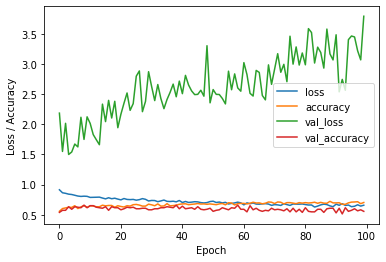


 ########## Result for Training data ########## 

log_loss:    0.6012
accuracy:    0.7216 

              precision    recall  f1-score   support

     class 1       0.80      0.76      0.78       282
     class 2       0.67      0.50      0.57        40
     class 3       0.61      0.70      0.65       145

    accuracy                           0.72       467
   macro avg       0.69      0.66      0.67       467
weighted avg       0.73      0.72      0.72       467



2021-12-04 17:18:22.015346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


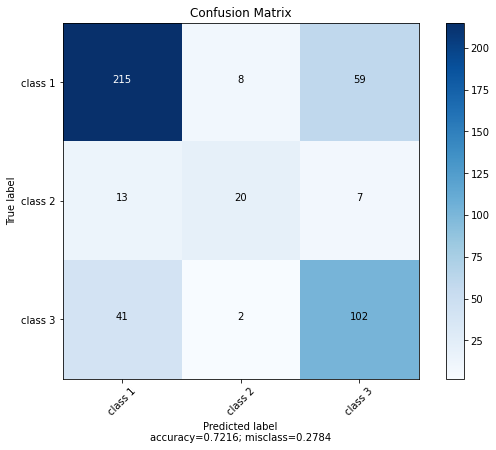


 ########## Result for Validation data ########## 

log_loss:    0.8058
accuracy:    0.6308 

              precision    recall  f1-score   support

     class 1       0.70      0.68      0.69       115
     class 2       0.75      0.38      0.50        16
     class 3       0.51      0.61      0.56        64

    accuracy                           0.63       195
   macro avg       0.66      0.55      0.58       195
weighted avg       0.64      0.63      0.63       195



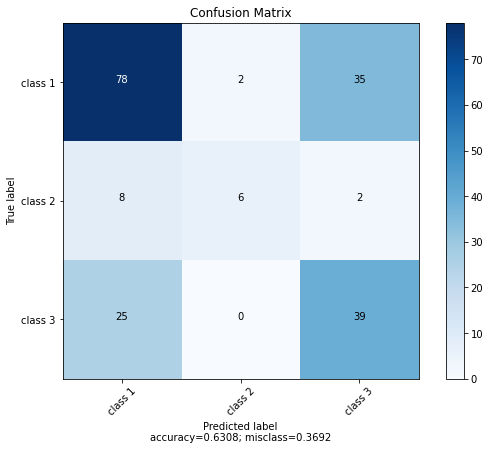

CPU times: user 10.2 s, sys: 3.96 s, total: 14.2 s
Wall time: 11 s


In [212]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()
print(x_trn.shape, d_trn.shape)
x_trn, x_val, d_trn, d_val = model_selection.train_test_split(x_trn, d_trn, test_size=0.2, random_state=42)

# YOUR CODE HERE
# print(x_trn, "\n", d_trn)
x_trn = preprocessing.normalize(x_trn)
x_tst = preprocessing.normalize(x_tst)

num_classes=d_trn.shape[1]

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [50, 10],                  
         'drop_nod': 0.15,                
         'act_fun': 'relu',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun': 'categorical_crossentropy',           
         'lr_rate': 0.02,
         'metric': 'accuracy',              
         'lambd' : 0.0,
         'num_out' : num_classes }

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 100,   
                      validation_data=(x_val,d_val),  
                      batch_size=50,          
                      verbose = 0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# # plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Validation data')

# stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
# stats_reg(d_tst, pred_val, 'Validation', estimator_ex2)


### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and I suggest at least 1000 data points to get "good" spirals.

#### Question 10
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

---
'n_nod': [100, 50, 20],              
'drop_nod': 0.0,                 
'act_fun': 'tanh',                 
'out_act_fun': 'sigmoid',          
'opt_method': 'Adam',             
'cost_fun': 'binary_crossentropy', 
'lr_rate': 0.01,

epochs = 200,                
batch_size=100,   

sigmoid
Model: "model_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_460 (Dense)            (None, 100)               300       
_________________________________________________________________
dropout_290 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_461 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_291 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_462 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_292 (Dropout)        (None, 20)          

2021-12-04 17:20:28.675602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.5273
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5527
Epoch 3/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5687
Epoch 4/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.5743
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.5673
Epoch 6/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.5683
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.5593
Epoch 8/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.5783
Epoch 9/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.5793
Epoch 10/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.5887
Epoch 11/200
30/30 [=

2021-12-04 17:20:53.981069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-04 17:20:54.122313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



 ########## STATISTICS for Training Data ########## 

Accuracy        1.0000
Sensitivity     1.0000
Specificity     1.0000
Loss            0.0002

 ##################################################


2021-12-04 17:20:54.218101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


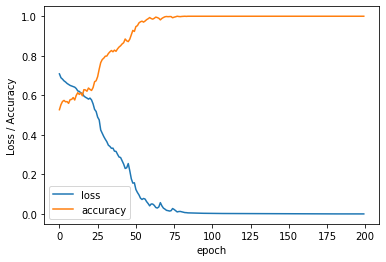

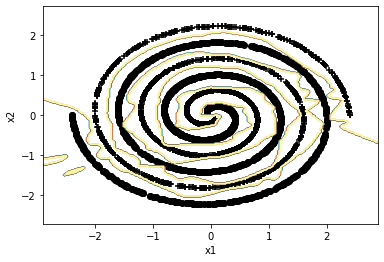

CPU times: user 23.9 s, sys: 12.9 s, total: 36.8 s
Wall time: 27.3 s


In [216]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [100, 50, 20],              
         'drop_nod': 0.0,                 
         'act_fun': 'tanh',                 
         'out_act_fun': 'sigmoid',          
         'opt_method': 'Adam',             
         'cost_fun': 'binary_crossentropy', 
         'lr_rate': 0.01,                 
         'num_out' : 1 }                   

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 200,                
                      batch_size=100,                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)

# The report!


### Name
Mahir Hambiralovic

### Introduction
A laboration in the fine-tuning of different hyper-parameters to primarily avoid overfiting and discovering how train-accuracy and test-accuracy do not always correlate.

### Answers to questions


#### Question 1
Accuracy        0.8780
Sensitivity     0.9040
Specificity     0.8520
Loss            0.2917


#### Question 2
a)
With 10 nodes, we receive an accuracy of 96% with all the hyperparameters constant. If we allow to change hyper-parameters, we can get away with 8 hidden nodes (lr_rate = 0.04, batch_size 30, epochs 700). With this network we get the following training.

b)
stats:
Accuracy        0.9500
Sensitivity     0.9400
Specificity     0.9600
Loss            0.0798


#### Question 3
However, we are almost always interested in optimal validation performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained?**

---
a)
Keeping constant hyperparameters (lr_rate = 0.05, batch_size = 25, epochs = 500)
Nodes, validation accuracy
1 0.8710
2 0.8270
3 0.8350
4 0.8370
5 0.8380

b)
Looking at the data, we see that the optimal decision boundary for any random dataset is a straight line. Hence, a single hidden should perform best with its linear decision boundary (unlike higher-order networks with clear overfitting), which we can see in the above tests. 


#### Question 4
Using the default hyperparameters.
Run 1:

Nodes, MSE
**1: 0.5971611738**
2: 0.6119188070
3: 0.6430530548
**4: 0.5613020062**
5: 0.7509353757

Run 2:
1: 0.6017894149
**4: 0.5126953125**

Looking at the above numbers, it seems like 4 nodes gives the lowest MSE using the default parameters.

#### Question 5
a)
Using 8 hidden nodes.

lambd, MSE
0.0: 0.6774694920
0.2: 0.6017894149
0.3: 0.6077176929
**0.4: 0.5969517827**
0.5: 0.6378090978
0.6: 0.6189390421
0.8: 0.6031998992

b)
It seems like it improves the error substantially, however with the default other parameters it does not outperform the smaller network without L2.


#### Question 6
Using 12 hidden nodes.

drop_nod, MSE
0.0: 0.5740687847
0.1: 0.5185875893
**0.2: 0.5177022815**
0.3: 0.5748681426
0.4: 0.6039562821
0.6: 0.6043797135

b)
It seems like it improves the error substantially, and gives about the equivalent accuracy to the 4 node network.


#### Question 7
With nodes=[30,15], lr_rate=0.04, epochs=100, drop_nod=0.15, batch_size=200 

**test accuracy: 0.91**

#### Question 8
Since loss is dependant on the distance from the predicted value to the actual value (in classification this is a float 0 to 1), but accuracy is dependant on the binary classification of a 1 or a zero, an increasing loss could mean that the model is less "sure" of its predictions (the prediction is closer to the threshold e.g. 0.5), but the number of correct answers above or below the threshold is the same.
The best criteria would be the accuracy in this case.


#### Question 9
a) Managed to get 0.63 accuracy and 0.55 recall with a n_nod=[50, 10], drop_nod: 0.15, lr_rate: 0.02, epochs=100

b) The sensitivity (recall) of the predictions is very important, as the model can achieve high accuracy despite having 100% false negatives.


#### Question 10
Achieved 0 training error with:

'n_nod': [100, 50, 20],              
'drop_nod': 0.0,                 
'act_fun': 'tanh',                 
'out_act_fun': 'sigmoid',          
'opt_method': 'Adam',             
'cost_fun': 'binary_crossentropy', 
'lr_rate': 0.01,

epochs = 200,                
batch_size=100,   

### Summary
In the lab, we saw how (particularly complex) ANN's easily overtrain to noise in the training data. It was observed that dropout, in combination with the number of nodes, was an effective tool for avoiding overtraining.